# Nowcasting with Google Trends


Google Trends is a public web facility of Google Inc., based on Google Search, that shows how often a particular search-term is entered relative to the total search-volume across various regions of the world, and in various languages (https://en.wikipedia.org/wiki/Google_Trends).

Google Trends is a useful way to compare changes in popularity of certain search terms over time, and Google Trends data can be used as a proxy for all sorts of difficult-to-measure quantities like economic activity and disease propagation. 

Compared to the social media tools we have seen so far, it has the advantage that we do not depend on users giving us information directly about their state of mind, but we can derive it from their search behaviour and information needs: 

- Google's own research has shown that 'the volume of Google searches for particular keywords is correlated with related economic indicators'. http://blog.revolutionanalytics.com/2009/09/google-uses-r-to-predict-economic-activity.html
- The purpose of Google Flu Trends (GFT) is to use search keyword trends from Google.com to produce a daily estimate, or nowcast, of the occurrence of flu two weeks in advance of publication of official surveillance data. (https://research.google.com/pubs/pub41763.html). This method has also been called 'Nowcasting' and has been controversial (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4522652/).


In [1]:
import pandas as pd    
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
pytrend = TrendReq()

Let's execute a simple query and find out about the interest in KCL in GB compared to our German partner university Humboldt University Berlin (HUB).

In [2]:
pytrend.build_payload(kw_list=['KCL'], geo='GB')
df1 = pytrend.interest_over_time()

In [3]:
pytrend.build_payload(kw_list=['KCL'], geo='DE')
df2 = pytrend.interest_over_time()

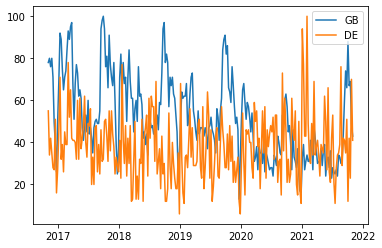

In [4]:
plt.plot(df1['KCL'], label='GB')
plt.plot(df2['KCL'], label='DE')
plt.legend()
plt.show()

KCL clearly has seasonal peaks and lows. Why do you think this is the case?

The plot function plots the time series interest_over_time, which we can also access with head.

In [5]:
df2.head()

,KCL,isPartial
date,,
2016-11-06,55,False
2016-11-13,34,False
2016-11-20,42,False
2016-11-27,35,False
2016-12-04,28,False


When people search for a certain topic they also search for something related, these are called related topics.
We can acces them through related_topics() which returns a dictionary of related queries

In [6]:
pytrend.build_payload(kw_list=['KCL'], geo='GB')
pytrend.related_topics()

{'KCL': {'rising':     value formattedValue                                               link  \
  0    2200        +2,200%  /trends/explore?q=/m/02tfkk&date=today+5-y&geo=GB   
  1     350          +350%   /trends/explore?q=/m/0bwd5&date=today+5-y&geo=GB   
  2     300          +300%  /trends/explore?q=/m/02qsj2k&date=today+5-y&ge...   
  3     250          +250%   /trends/explore?q=/m/02j62&date=today+5-y&geo=GB   
  4     250          +250%  /trends/explore?q=/m/0134hp&date=today+5-y&geo=GB   
  5     200          +200%   /trends/explore?q=/m/0gl6f&date=today+5-y&geo=GB   
  6     170          +170%  /trends/explore?q=/m/02_xgp2&date=today+5-y&ge...   
  7     140          +140%  /trends/explore?q=/m/05gdk8&date=today+5-y&geo=GB   
  8     130          +130%   /trends/explore?q=/m/01jj2&date=today+5-y&geo=GB   
  9     130          +130%  /trends/explore?q=/g/11fy_1c9yx&date=today+5-y...   
  10    110          +110%  /trends/explore?q=/m/016t_3&date=today+5-y&geo=GB   
  11    100

<AxesSubplot:xlabel='date'>

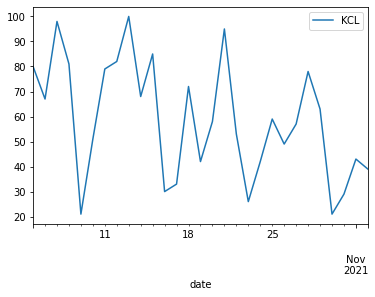

In [7]:
pytrend.build_payload(kw_list=['KCL'], geo='GB', timeframe='today 1-m')

df3 = pytrend.interest_over_time()
df3.plot()

We can search  other Google applications, too. For instance, news and youtube.

<AxesSubplot:xlabel='date'>

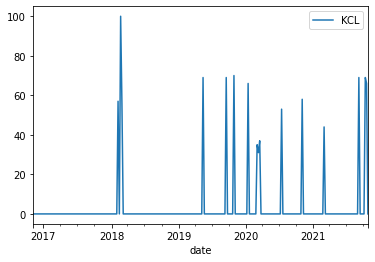

In [8]:
pytrend.build_payload(kw_list=['KCL'], geo='GB', gprop='news')

df4 = pytrend.interest_over_time()
df4.plot()

<AxesSubplot:xlabel='date'>

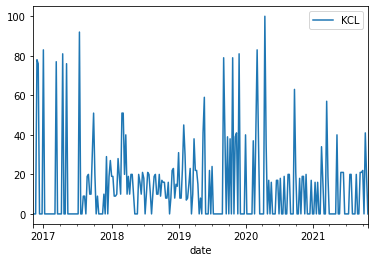

In [9]:
pytrend.build_payload(kw_list=['KCL'], geo='GB', gprop='youtube')

df5 = pytrend.interest_over_time()
df5.plot()

That's. It really is that easy to get exciting data from Google. 

Your exercise would be to define your own two sites you would like to compare. What do you discover?